In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from google.colab import files

uploaded = files.upload()

Saving boston.csv to boston (2).csv


1. Загрузите данные из файла "boston.csv" о недвижимости в различных
районах Бостона.

In [ ]:
df = pd.read_csv('boston.csv',
                 usecols=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                          'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
                          'B', 'LSTAT', 'MEDV'])
print(df)


        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

2. Проверьте, что у всех загруженных данных числовой тип.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Среди dtypes только float и их 14, как и признаков.

3. Проверьте, есть ли по каким-либо признакам отсутствующие данные.
Если отсутствующие данные есть – заполните их медианным
значением.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Non-null count у каждого признака равен 506, как и количество строк, значит, отсутствующих данных нет.

4. Посчитайте коэффициент корреляции для всех пар признаков.
Подсказка: воспользуйтесь методом corr() для датафрейма, чтобы
получить сразу всю корреляционную матрицу.

In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

5. С помощью одной из библиотек визуализации постройте тепловую
карту (heatmap) по корреляционной матрице.

<Axes: >

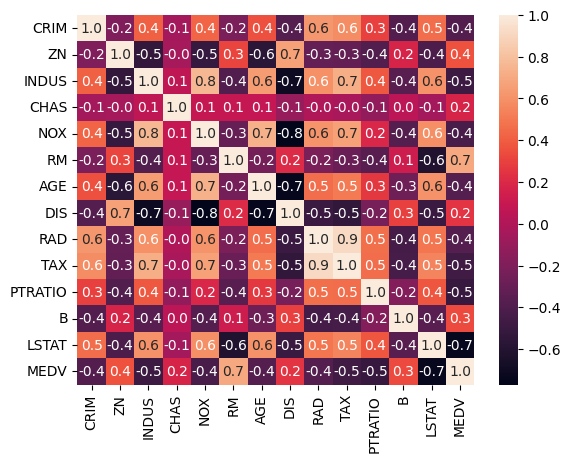

In [ ]:
sns.heatmap(corr_matrix, annot=True, fmt=".1f")

6. Выберите от 4 до 6 признаков, наиболее подходящих для анализа (на свое
усмотрение, выбор обоснуйте), которые в наибольшей степени
коррелируют с целевым признаком (ценой недвижимости).

Возьмем признаки наиболее коррелируемые с MEDV

RM - среднее количество комнат в доме, имеет положительную корреляцию 0,7 - чем больше комнат в доме, тем он просторнее и, следовательно, дороже

LSTAT - процент населения с низким социальным статусом, имеет отрицательную корреляцию -0,7, что говорит об обратной линейной зависимости, районы с более высоким процентом малообеспеченного населения имеют более низкую стоимость жилья

INDUS - имеет достаточно сильную отрицательную корреляцию -0,5 - этот признак часто указывает на количество промышленных зон в районе, что негативно сказывается на цене

TAX - имеет достаточно сильную отриательную корреляцию -0,5 - этот признак на налоги, чем они выше, тем меньше привлекает жилье.

PTRATIO - соотношение количества учеников и учителей, имеет достаточно сильную отрицательную корреляцию -0,5 - для семей важно наличие школ рядом с жильем

7. Для каждого из выбранных признаков в паре с целевым признаком
постройте точечную диаграмму (диаграмму рассеяния).

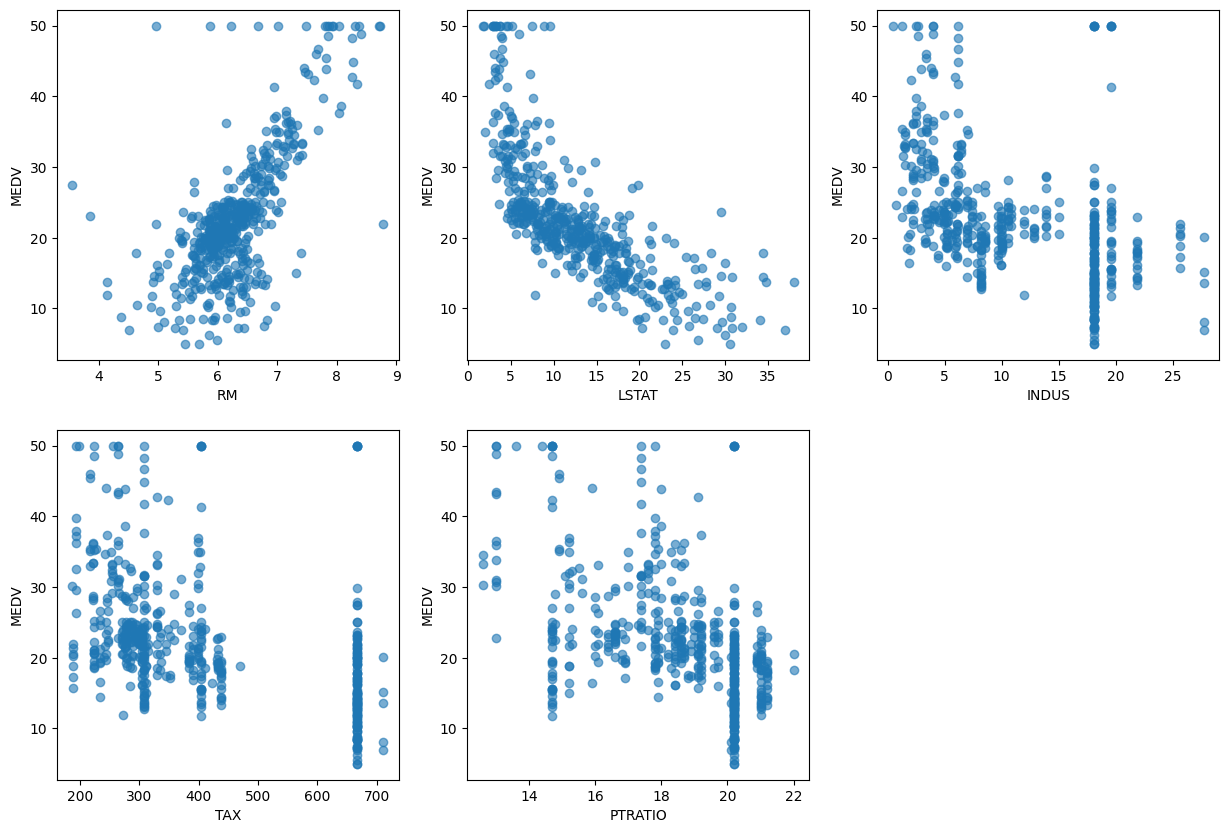

In [ ]:
features = ['RM', 'LSTAT', 'INDUS', 'TAX', 'PTRATIO', 'B']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df['MEDV'], alpha=0.6)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('MEDV')

axes[5].set_visible(False)

8. Визуально убедитесь, что связь между выбранным признаком и целевым
прослеживается. Если на основе графика считаете, что зависимости
нет – исключите этот признак из дальнейшего рассмотрения (но при
этом как минимум 3 признака должно остаться в любом случае, если не
получается выбрать три признака, вернитесь к шагу 6).

Выбираем признаки RM и LSTAT. Помимо них возьмем INDUS, зависимость не самая сильная, но все равно прослеживается

9. Сформируйте список факторных признаков и целевую переменную.

In [ ]:
# Факторные признаки
X = df[['RM', 'LSTAT', 'INDUS']]

# Целевая переменная
y = df['MEDV']

10. Выполните разбиение датасета на обучающую и тестовую выборки в
соотношении 8:2. При формировании обучающей и тестовой выборок
строки из исходного датафрейма должны выбираться в случайном
порядке. Подсказка: можно воспользоваться функцией train_test_split из
библиотеки sklearn.model_selection.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=23)

11. Из набора линейных моделей библиотеки sklearn возьмите линейную
регрессию, обучите ее на обучающем наборе.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

12. Получите векторы прогнозных значений целевой переменной на
обучающей и на тестовой выборках.

In [ ]:
training_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)

print(training_prediction)
print()
print(test_prediction)

[28.94931336 39.82401313 20.24927188 23.96527609 29.52363402 22.96611293
 19.20445903 17.91358535 23.26100508 18.52064387 25.15697073 21.7519913
 22.12321367 26.83507027 16.67592492 23.40485083 25.63529115 22.09613975
 21.53280135 18.75257558 19.40187501 26.96334014 10.09289802 26.71235708
 18.27798585 18.59782295 26.38147463 17.6120814  27.21677951 23.42686233
  0.31421231 20.84172738 16.34346429 18.23481499 20.51915284 19.11102795
 18.11506246 34.98673864 16.42519636 29.44968885 33.47020302  4.33193855
 26.90885626 33.07495426 32.71186524 25.17750317  1.40281797 12.76083929
 31.50341578 28.93909686 27.64051851 37.09667227 24.15250706 24.31213394
 18.66060931  5.05267499 14.57742345 14.985083   25.82389093 19.80051544
 21.06885885 20.18583371 16.30127175  8.55823222 28.54787767  5.01024342
 26.22993723 22.88685149  9.6451196  32.30725222 11.40641902 28.25176295
 26.09148    25.95907308 19.39105512 29.44475876 30.43019837 22.8645933
 16.99782308 23.35062317 13.63651662 25.97141976 25.0

13. Посчитайте коэффициент детерминации
(R2)
и корень из
среднеквадратичной ошибки (RMSE) на обучающей и на тестовой
выборках. проанализируйте полученные данные. Если данные не
удовлетворительные, вернитесь к шагу

In [ ]:
R2_train = r2_score(y_train, training_prediction)
R2_test = r2_score(y_test, test_prediction)

print(f"Коэффициент детерминации обучающей выборки: {R2_train:.2f}")
print(f"Коэффициент детерминации тестовой выборки: {R2_test:.2f}")

Коэффициент детерминации обучающей выборки: 0.64
Коэффициент детерминации тестовой выборки: 0.65


In [ ]:
RMSE_train = mean_squared_error(y_train, training_prediction)**0.5
RMSE_test = mean_squared_error(y_test, test_prediction)**0.5

print(f"Корень из среднеквадратичной ошибки обучающей выборки: {RMSE_train:.2f}")
print(f"Корень из среднеквадратичной ошибки тестовой выборки: {RMSE_test:.2f}")

Корень из среднеквадратичной ошибки обучающей выборки: 5.51
Корень из среднеквадратичной ошибки тестовой выборки: 5.52


Модель объясняет около 65% изменчивости цен на недвижимость и средняя ошибка предсказания составляет примерно $5,510
Это довольно неплохой результат, модель работает удовлетворительно

**Дополнительные задания (4 балла)**

14. Постройте boxplot («ящик с усами») для целевого признака
(MEDV). Определите, по диаграмме какие значения можно считать
выбросами.

Text(0, 0.5, 'MEDV (тыс. $)')

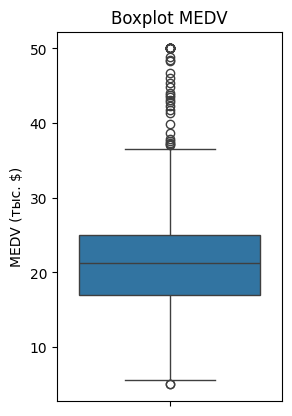

In [ ]:
plt.subplot(1, 2, 2)
sns.boxplot(y=df['MEDV'])
plt.title('Boxplot MEDV')
plt.ylabel('MEDV (тыс. $)')

15. Отфильтруйте исходные данные, удалив выбросы. Пересоздайте
тестовую и обучающую выборки, переобучите модель. Посчитайте
показатели R2 и RMSE. Как они изменились? О чем это говорит?

In [ ]:
Q1 = df['MEDV'].quantile(0.25)
Q3 = df['MEDV'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered = df[(df['MEDV'] >= lower_bound) & (df['MEDV'] <= upper_bound)]

X_filtered = filtered[['RM', 'LSTAT', 'INDUS']]
y_filtered = filtered['MEDV']

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=23
)

model_filtered = LinearRegression()
model_filtered.fit(X_train_f, y_train_f)

y_pred_train_f = model_filtered.predict(X_train_f)
y_pred_test_f = model_filtered.predict(X_test_f)

R2_train_f = r2_score(y_train_f, y_pred_train_f)
R2_test_f = r2_score(y_test_f, y_pred_test_f)
RMSE_train_f = (mean_squared_error(y_train_f, y_pred_train_f))**0.5
RMSE_test_f = (mean_squared_error(y_test_f, y_pred_test_f))**0.5

print("После удаления выбросов: ")
print(f"Коэффициент детерминации обучающей выборки: {R2_train_f:.2f}")
print(f"Коэффициент детерминации тестовой выборки: {R2_test_f:.2f}")
print(f"Корень из среднеквадратичной ошибки обучающей выборки: {RMSE_train_f:.2f}")
print(f"Корень из среднеквадратичной ошибки тестовой выборки: {RMSE_test_f:.2f}")

print("\nДо удаления выбросов: ")
print(f"Коэффициент детерминации обучающей выборки: {R2_train:.2f}")
print(f"Коэффициент детерминации тестовой выборки: {R2_test:.2f}")
print(f"Корень из среднеквадратичной ошибки обучающей выборки: {RMSE_train:.2f}")
print(f"Корень из среднеквадратичной ошибки тестовой выборки: {RMSE_test:.2f}")


После удаления выбросов: 
Коэффициент детерминации обучающей выборки: 0.66
Коэффициент детерминации тестовой выборки: 0.58
Корень из среднеквадратичной ошибки обучающей выборки: 3.77
Корень из среднеквадратичной ошибки тестовой выборки: 4.09

До удаления выбросов: 
Коэффициент детерминации обучающей выборки: 0.64
Коэффициент детерминации тестовой выборки: 0.65
Корень из среднеквадратичной ошибки обучающей выборки: 5.51
Корень из среднеквадратичной ошибки тестовой выборки: 5.52


Коэффициент детерминации тестовой выборки стал меьнше, корень из среднеквадратичной также уменьшился для обеих выборок. Судя по коэффициенту детерминации предсказывать модель стала похуже, так что выбросы все же были значимы, седя по уменьшению RMSE модель стала предсказывать лучше обычные случаи, но гораздо хуже экстремальные.

16. Из набора линейных моделей библиотеки sklearn возьмите
гребневую регрессию (Ridge). Обучите модель. Посчитайте показатели
R2 и RMSE. проанализируйте

In [ ]:
ridge_model = Ridge(alpha=1.0, random_state=23)
ridge_model.fit(X_train, y_train)

y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_test_ridge = ridge_model.predict(X_test)

R2_train_ridge = r2_score(y_train, y_pred_train_ridge)
R2_test_ridge = r2_score(y_test, y_pred_test_ridge)
RMSE_train_ridge = (mean_squared_error(y_train, y_pred_train_ridge))**0.5
RMSE_test_ridge = (mean_squared_error(y_test, y_pred_test_ridge))**0.5

print("Гребневая регрессия")
print(f"Коэффициент детерминации обучающей выборки: {R2_train_ridge:.3f}")
print(f"Коэффициент детерминации тестовой выборки:  {R2_test_ridge:.3f}")
print(f"Корень из среднеквадратичной ошибки обучающей выборки: {RMSE_train_ridge:.3f}")
print(f"Корень из среднеквадратичной ошибки тестовой выборки:  {RMSE_test_ridge:.3f}")

print("\nЛинейная регрессия: ")
print(f"Коэффициент детерминации обучающей выборки: {R2_train:.2f}")
print(f"Коэффициент детерминации тестовой выборки: {R2_test:.2f}")
print(f"Корень из среднеквадратичной ошибки обучающей выборки: {RMSE_train:.2f}")
print(f"Корень из среднеквадратичной ошибки тестовой выборки: {RMSE_test:.2f}")

Гребневая регрессия
Коэффициент детерминации обучающей выборки: 0.638
Коэффициент детерминации тестовой выборки:  0.645
Корень из среднеквадратичной ошибки обучающей выборки: 5.514
Корень из среднеквадратичной ошибки тестовой выборки:  5.526

Линейная регрессия: 
Коэффициент детерминации обучающей выборки: 0.64
Коэффициент детерминации тестовой выборки: 0.65
Корень из среднеквадратичной ошибки обучающей выборки: 5.51
Корень из среднеквадратичной ошибки тестовой выборки: 5.52


Метрики не улучшились, значит, в нашем случае мультиколлинеарность не была критичной проблемой

17. Постройте полиномиальную регрессию с использованием
полинома 3й степени. Посчитайте показатели R2 и RMSE. Сравните все
полученные результаты. Сделайте вывод.

In [ ]:
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('linear', LinearRegression())
])

poly_model.fit(X_train, y_train)

y_pred_train_poly = poly_model.predict(X_train)
y_pred_test_poly = poly_model.predict(X_test)

R2_train_poly = r2_score(y_train, y_pred_train_poly)
R2_test_poly = r2_score(y_test, y_pred_test_poly)
RMSE_train_poly = (mean_squared_error(y_train, y_pred_train_poly))**0.5
RMSE_test_poly = (mean_squared_error(y_test, y_pred_test_poly))**0.5

print("Полиномиальная регрессия: ")
print(f"Коэффициент детерминации обучающей выборки: {R2_train_poly:.3f}")
print(f"Коэффициент детерминации тестовой выборки:  {R2_test_poly:.3f}")
print(f"Корень из среднеквадратичной ошибки обучающей выборки: {RMSE_train_poly:.3f}")
print(f"Корень из среднеквадратичной ошибки тестовой выборки:  {RMSE_test_poly:.3f}")

print("\nЛинейная регрессия: ")
print(f"Коэффициент детерминации обучающей выборки: {R2_train:.2f}")
print(f"Коэффициент детерминации тестовой выборки: {R2_test:.2f}")
print(f"Корень из среднеквадратичной ошибки обучающей выборки: {RMSE_train:.2f}")
print(f"Корень из среднеквадратичной ошибки тестовой выборки: {RMSE_test:.2f}")

Полиномиальная регрессия: 
Коэффициент детерминации обучающей выборки: 0.844
Коэффициент детерминации тестовой выборки:  0.741
Корень из среднеквадратичной ошибки обучающей выборки: 3.614
Корень из среднеквадратичной ошибки тестовой выборки:  4.719

Линейная регрессия: 
Коэффициент детерминации обучающей выборки: 0.64
Коэффициент детерминации тестовой выборки: 0.65
Корень из среднеквадратичной ошибки обучающей выборки: 5.51
Корень из среднеквадратичной ошибки тестовой выборки: 5.52


Полиномиальная модель показала себя гораздо лучше всех протестироованных ранее, значит, для анализа лучше использовать её.